In [2]:
import pandas as pd
import numpy as np

In [3]:
df_pokemon = pd.read_csv('pokemon.csv')
df_mapping = pd.read_csv('pokemon_mapping.csv', encoding='cp1250', delimiter=';')

In [4]:
df_mapping.head()

,Id,Deutsch,Englisch
0,1.0,Bisasam,Bulbasaur
1,2.0,Bisaknosp,Ivysaur
2,3.0,Bisaflor,Venusaur
3,4.0,Glumanda,Charmander
4,5.0,Glutexo,Charmeleon


In [5]:
df_pokemon = df_pokemon.drop(['name', 'japanese_name'], axis = 1)
df_mapping = df_mapping.drop(['Englisch'], axis = 1)

In [6]:
df_mapping = df_mapping.dropna()
df_mapping['Id']=df_mapping['Id'].astype('int32')

In [7]:
df = df_pokemon.merge(df_mapping, how='inner', left_on=['pokedex_number'], right_on=['Id'])

In [8]:
df = df.drop('Id', axis =1)

In [9]:
df.dtypes

abilities             object
against_bug          float64
against_dark         float64
against_dragon       float64
against_electric     float64
against_fairy        float64
against_fight        float64
against_fire         float64
against_flying       float64
against_ghost        float64
against_grass        float64
against_ground       float64
against_ice          float64
against_normal       float64
against_poison       float64
against_psychic      float64
against_rock         float64
against_steel        float64
against_water        float64
attack                 int64
base_egg_steps         int64
base_happiness         int64
base_total             int64
capture_rate          object
classfication         object
defense                int64
experience_growth      int64
height_m             float64
hp                     int64
percentage_male      float64
pokedex_number         int64
sp_attack              int64
sp_defense             int64
speed                  int64
type1         

In [58]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Deutsch
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,Bisasam
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,Bisaknosp
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,Bisaflor
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,Glumanda
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,Glutexo


In [11]:
df.isnull().sum()

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0
is_legendary           0
Deutsch                0


In [12]:
df.describe()

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,...,height_m,hp,percentage_male,pokedex_number,sp_attack,sp_defense,speed,weight_kg,generation,is_legendary
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,...,781.000000,801.000000,703.000000,801.000000,801.000000,801.000000,801.000000,781.000000,801.000000,801.000000
mean,0.996255,1.057116,0.968789,1.073970,1.068976,1.065543,1.135456,1.192884,0.985019,1.034020,...,1.163892,68.958801,55.155761,401.000000,71.305868,70.911361,66.334582,61.378105,3.690387,0.087391
std,0.597248,0.438142,0.353058,0.654962,0.522167,0.717251,0.691853,0.604488,0.558256,0.788896,...,1.080326,26.576015,20.261623,231.373075,32.353826,27.942501,28.907662,109.354766,1.930420,0.282583
min,0.250000,0.250000,0.000000,0.000000,0.250000,0.000000,0.250000,0.250000,0.000000,0.250000,...,0.100000,1.000000,0.000000,1.000000,10.000000,20.000000,5.000000,0.100000,1.000000,0.000000
25%,0.500000,1.000000,1.000000,0.500000,1.000000,0.500000,0.500000,1.000000,1.000000,0.500000,...,0.600000,50.000000,50.000000,201.000000,45.000000,50.000000,45.000000,9.000000,2.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,65.000000,50.000000,401.000000,65.000000,66.000000,65.000000,27.300000,4.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,...,1.500000,80.000000,50.000000,601.000000,91.000000,90.000000,85.000000,64.800000,5.000000,0.000000
max,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,14.500000,255.000000,100.000000,801.000000,194.000000,230.000000,180.000000,999.900000,7.000000,1.000000


In [13]:
df.groupby('generation').count()['Deutsch']

generation
1    151
2    100
3    135
4    107
5    156
6     72
7     80
Name: Deutsch, dtype: int64

In [14]:
df.groupby('is_legendary').count()['Deutsch']

is_legendary
0    731
1     70
Name: Deutsch, dtype: int64

In [15]:
df.groupby('type1').mean().sort_values('attack')['attack'].tail(5)

type1
rock         90.666667
steel        93.083333
ground       94.812500
fighting     99.178571
dragon      106.407407
Name: attack, dtype: float64

In [16]:
df.groupby('type1').mean().sort_values('sp_attack')['sp_attack'].tail(5)

type1
flying      84.000000
electric    87.538462
fire        87.730769
dragon      89.592593
psychic     92.603774
Name: sp_attack, dtype: float64

In [17]:
df.groupby('type1').mean().sort_values('defense')['defense'].tail(5)

type1
ghost      79.518519
ground     83.906250
dragon     86.259259
rock       96.266667
steel     120.208333
Name: defense, dtype: float64

In [18]:
df.groupby('type1').mean().sort_values('sp_defense')['sp_defense'].tail(5)

type1
ghost      78.296296
steel      82.208333
dragon     84.555556
psychic    85.735849
fairy      87.777778
Name: sp_defense, dtype: float64

In [19]:
df.groupby('type1').mean().sort_values('hp')['hp'].tail(5)

type1
psychic    72.943396
ground     73.187500
fairy      73.944444
normal     76.723810
dragon     79.851852
Name: hp, dtype: float64

In [20]:
df.groupby('type1').mean().sort_values('speed')['speed'].tail(5)

type1
psychic     75.150943
dark        75.310345
dragon      76.111111
electric    85.410256
flying      99.666667
Name: speed, dtype: float64

In [21]:
df.groupby('type1').sum().sort_values('is_legendary')['is_legendary'].tail(5)

type1
electric     5
steel        6
water        6
dragon       7
psychic     17
Name: is_legendary, dtype: int64

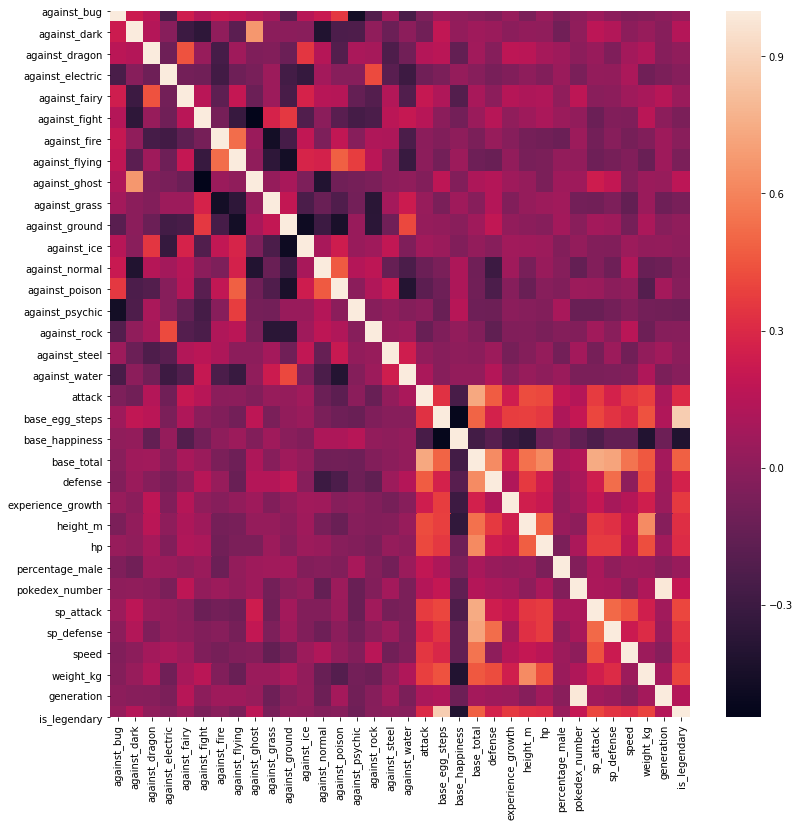

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 


# calculate the correlation matrix 
corr = df.corr() 

plt.figure(figsize=(13, 13))
# plot the heatmap 
sns.heatmap(corr, 
     xticklabels=corr.columns, 
     yticklabels=corr.columns)

In [23]:
ad = dev = np.arange(1, 150)

In [24]:
z = ad/(50*dev)

In [25]:
stats.shape

NameError: name 'stats' is not defined

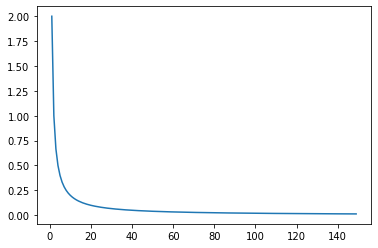

In [26]:
plt.plot(dev, 100/(50*dev))

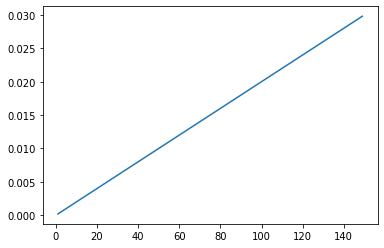

In [27]:
plt.plot(ad, ad/(50*100))

In [57]:
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,Deutsch
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,Bisasam
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,Bisaknosp
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,Bisaflor
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,Glumanda
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,Glutexo


In [46]:
value = 122/50*120+100/50*123

In [47]:
value

538.8

In [54]:
value2 = 104/50*78+159/50*115

In [55]:
value2

527.94